## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed 
rseed = 42 # sets a random seed to 42, ensuring consistent random results, 

## Load and explore data

In [3]:
# Import the Country dataset
df = pd.read_csv('Country-data.csv')

In [4]:
# Check the shape
print("Shape of the dataset:", df.shape)

Shape of the dataset: (167, 10)


In [5]:
# Check datatypes & counts
print("Datatypes and counts:")
print(df.info())

Datatypes and counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [6]:
# Get descriptive statistics
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000   

In [7]:
# Identify any missing data
print("Missing data:")
print(df.isnull().sum())

Missing data:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


Each column has a count of 167 non-null values, which means there are no missing or null values in any of the rows for each variable.

## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
df_numeric = df.select_dtypes(include='number')

In [9]:
# Display the updated DataFrame
print("DataFrame after dropping non-numeric features:")
print(df_numeric)

DataFrame after dropping non-numeric features:
     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82  

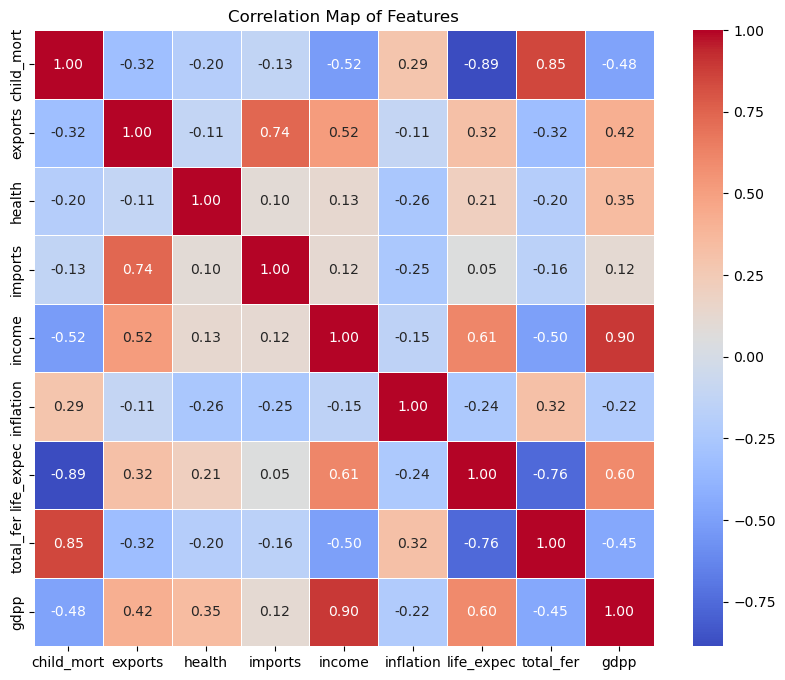

In [10]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

# Create a correlation map
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Map of Features')
plt.show()

In [11]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

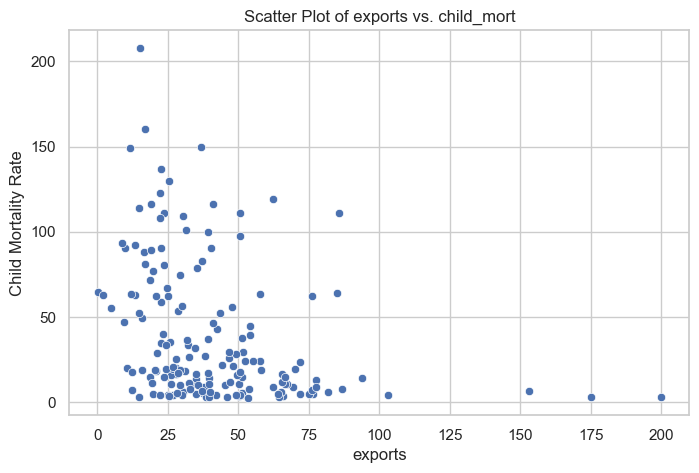

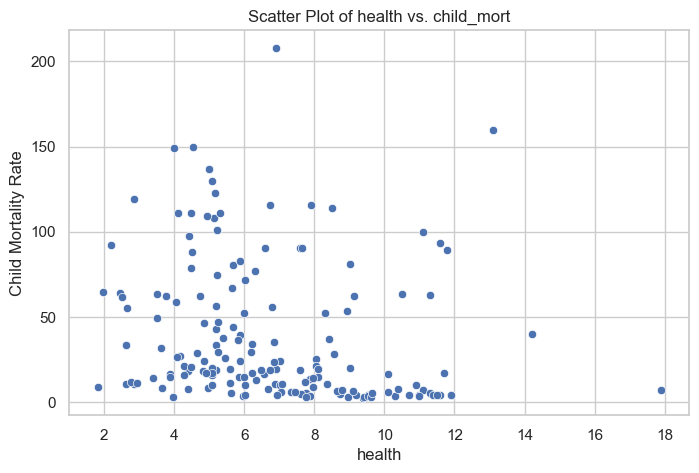

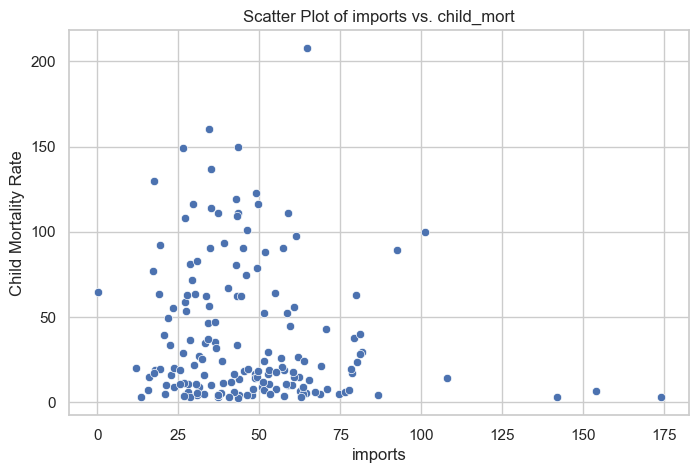

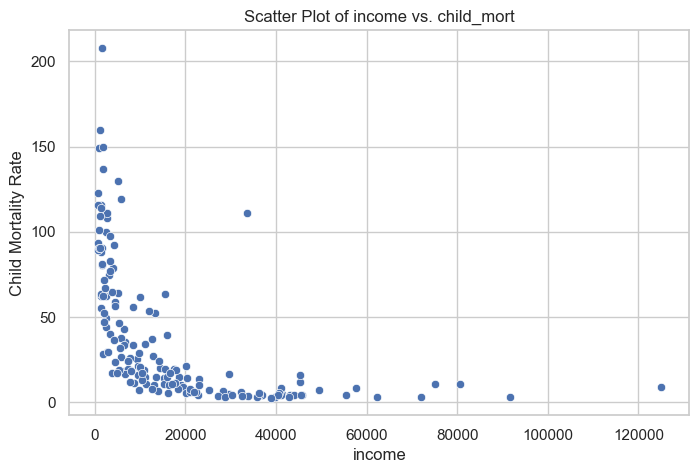

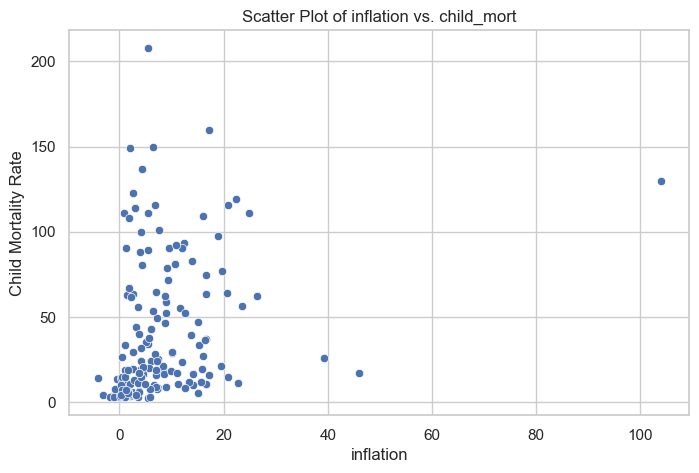

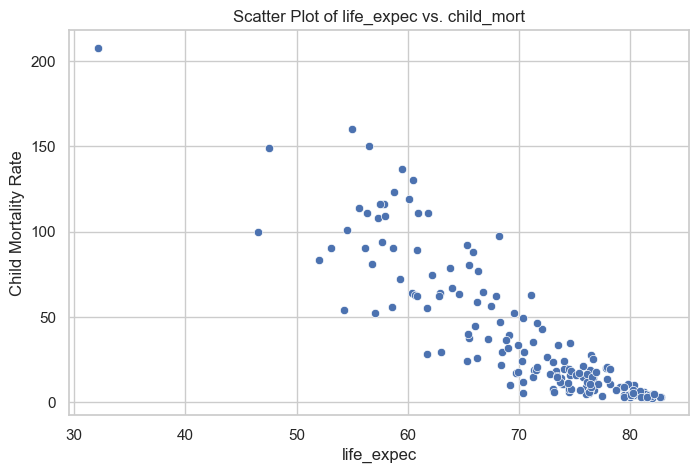

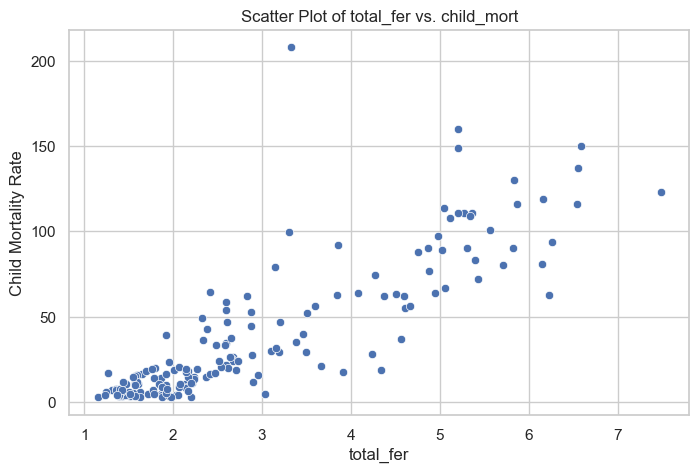

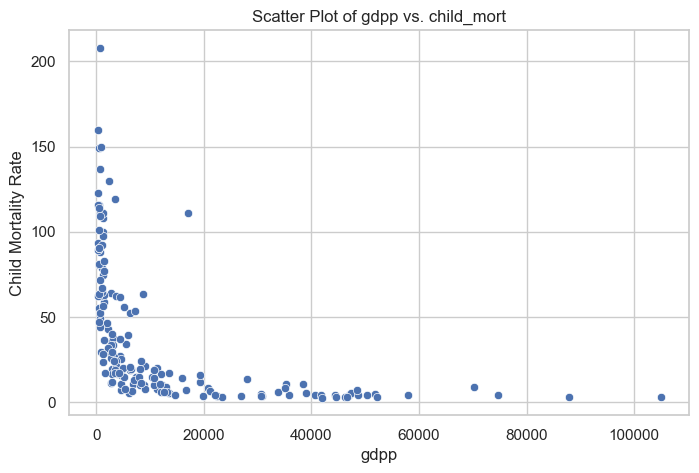

In [12]:
# Explore the continuous independent features against child_mort using scatter plots.

# Selecting continuous independent features
continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create scatter plots
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature, y='child_mort', data=df)
    plt.title(f'Scatter Plot of {feature} vs. child_mort')
    plt.xlabel(feature)
    plt.ylabel('Child Mortality Rate')
    plt.show()

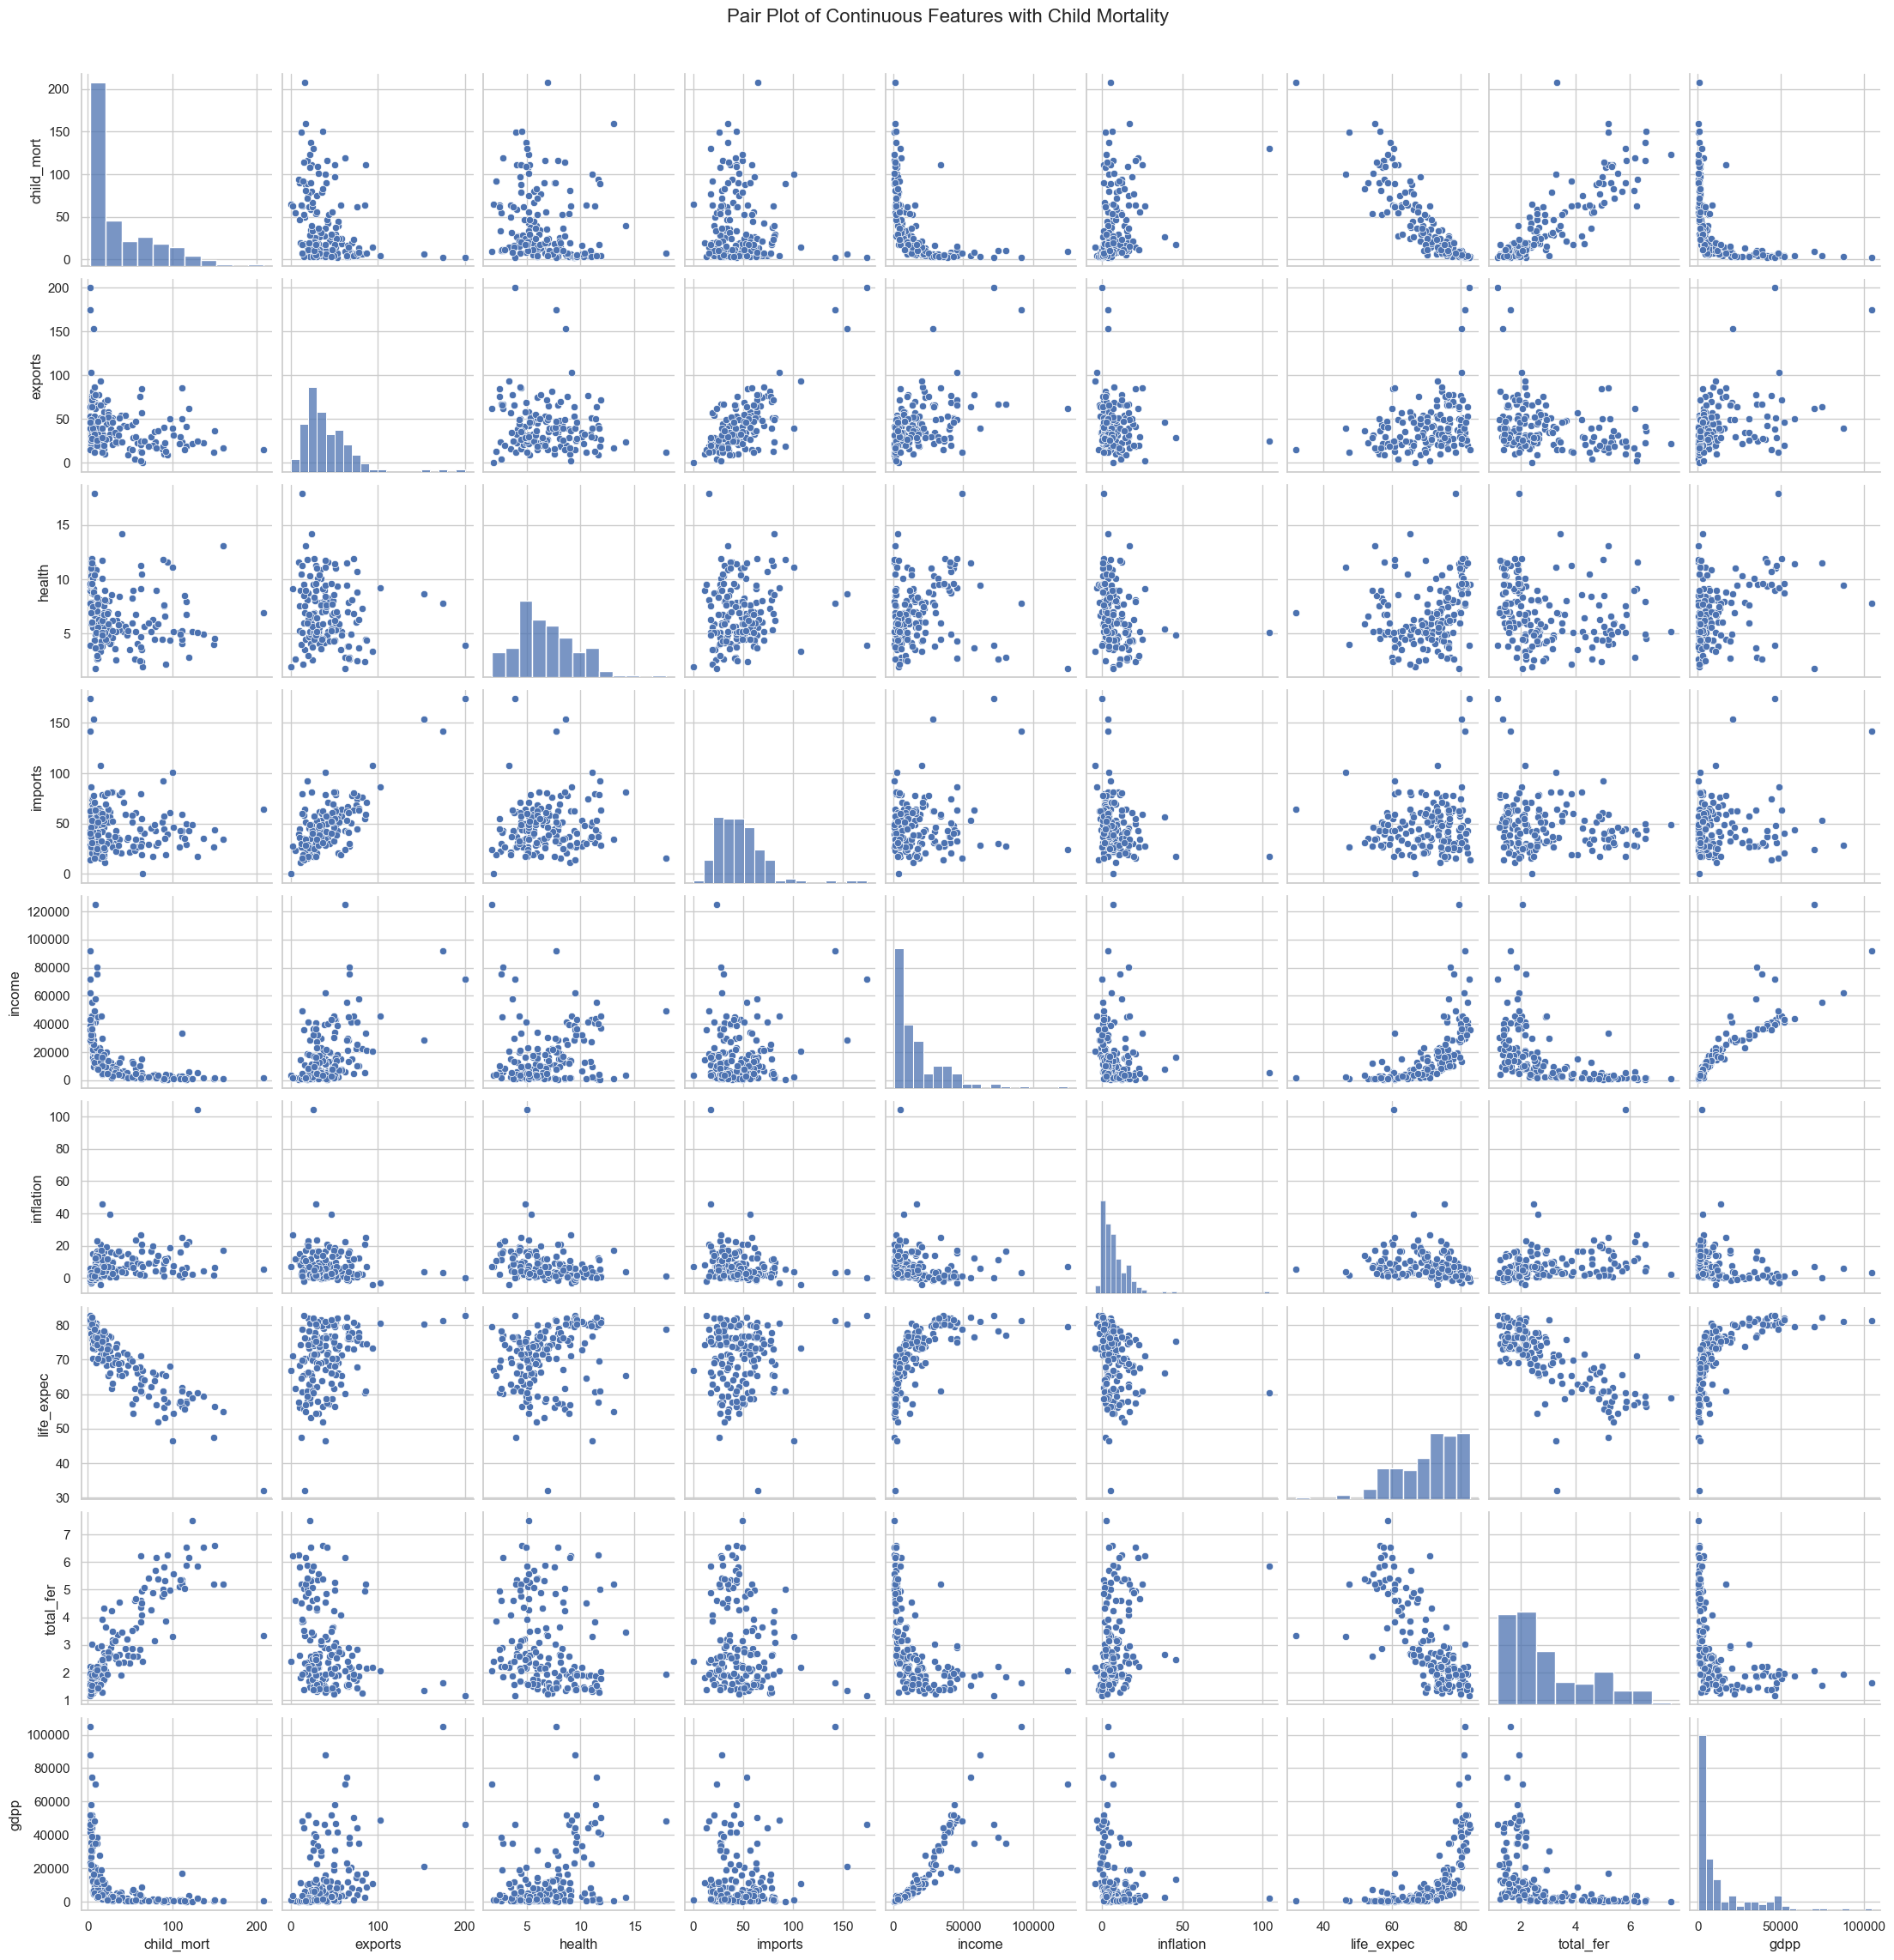

In [13]:
#  Creating extra plots for visualisations.

# Include 'child_mort' in the pair plot
continuous_features_with_child_mort = ['child_mort'] + continuous_features

# Create pair plot
sns.pairplot(df[continuous_features_with_child_mort])
plt.suptitle('Pair Plot of Continuous Features with Child Mortality', y=1.02, fontsize=16)
plt.show()


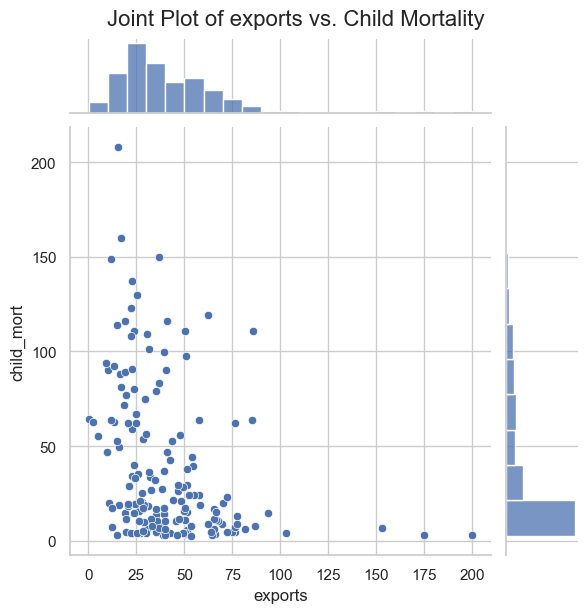

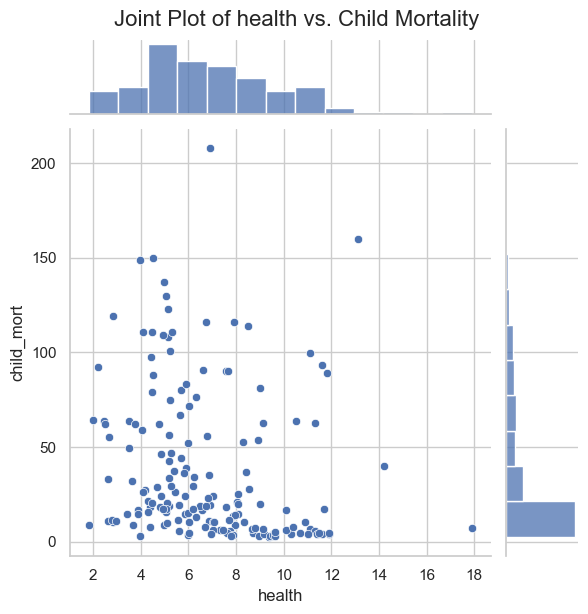

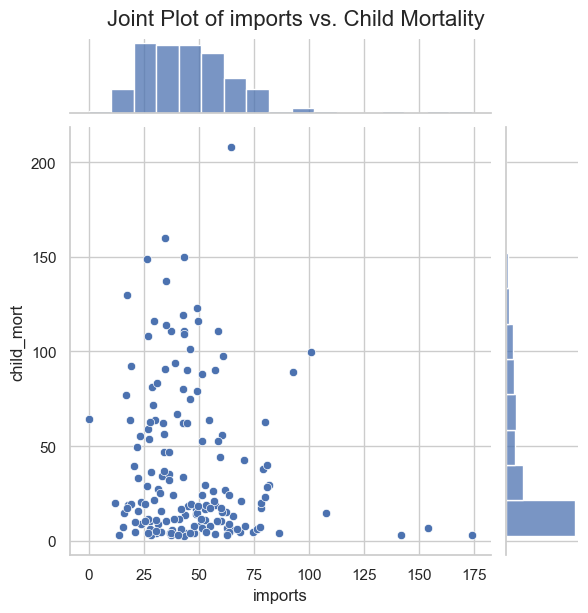

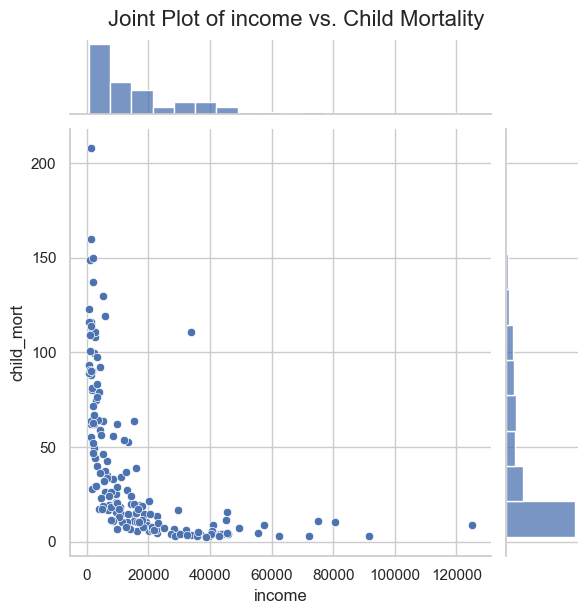

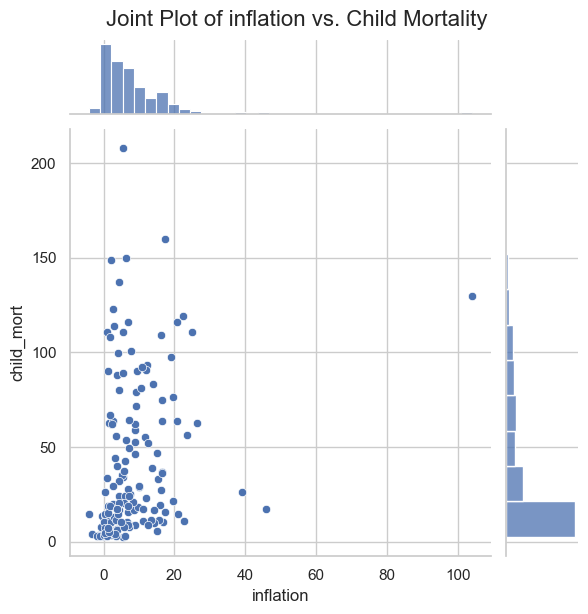

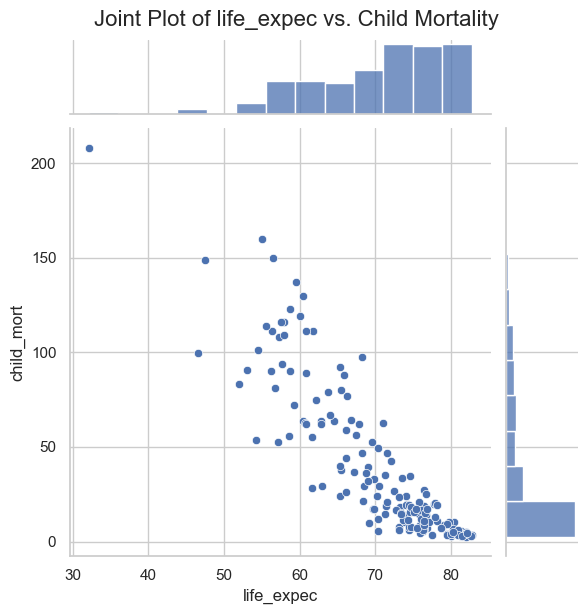

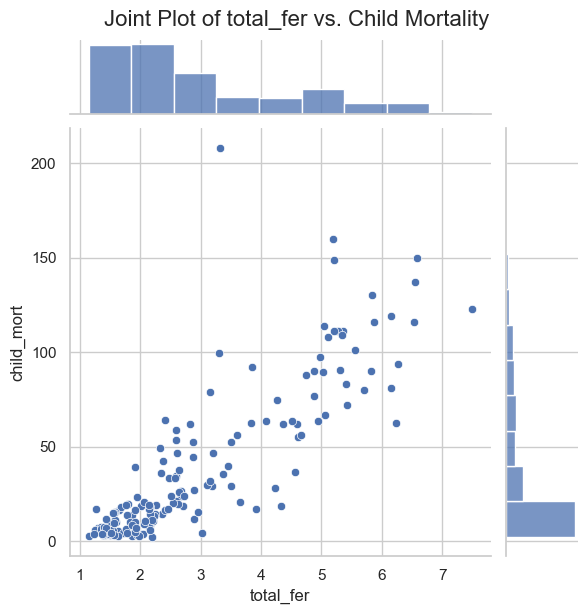

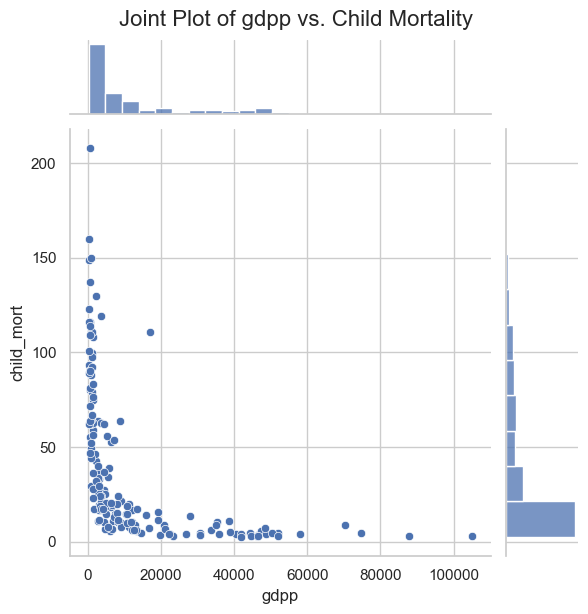

In [14]:
# Create joint plots for each continuous feature
for feature in continuous_features:
    sns.jointplot(x=df[feature], y=df['child_mort'], kind='scatter')
    plt.suptitle(f'Joint Plot of {feature} vs. Child Mortality', y=1.02, fontsize=16)
    plt.show()

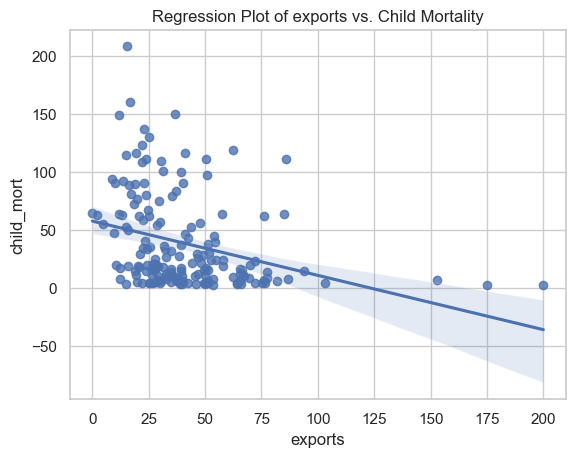

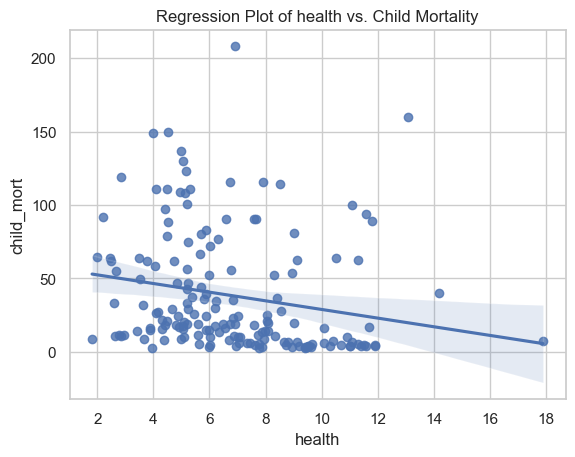

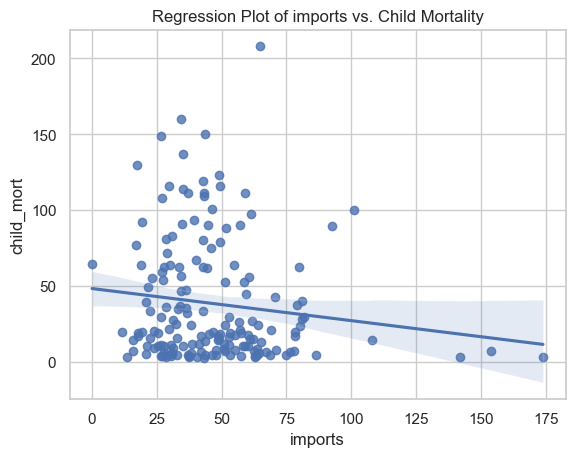

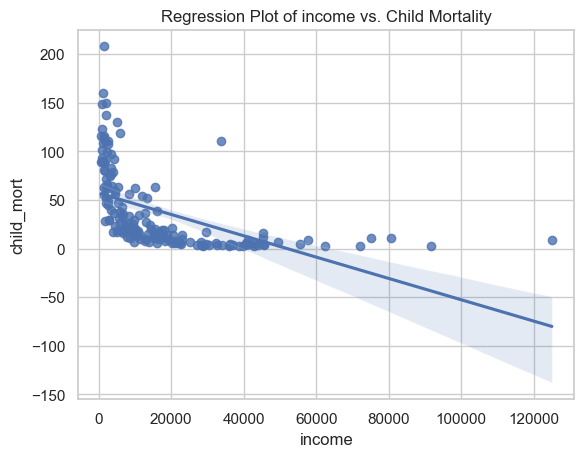

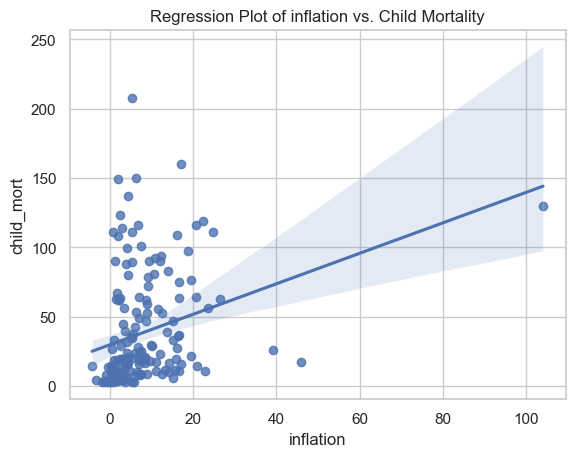

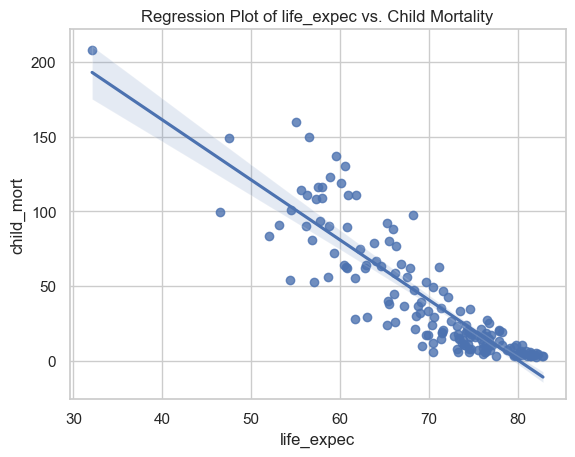

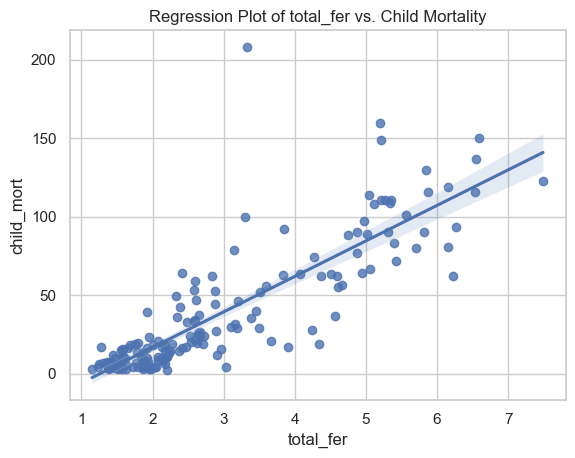

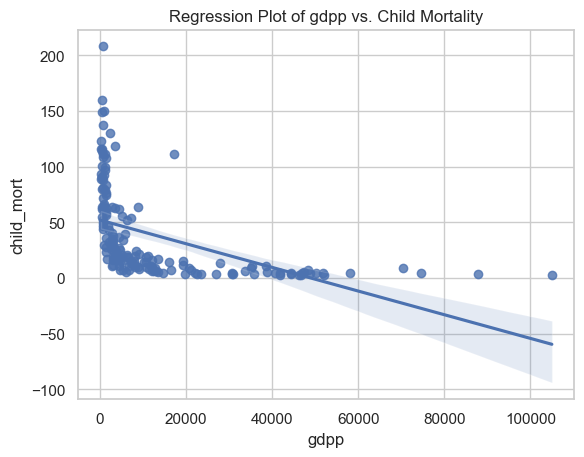

In [15]:
# Create regression plots for each continuous feature
for feature in continuous_features:
    sns.regplot(x=df[feature], y=df['child_mort'])
    plt.title(f'Regression Plot of {feature} vs. Child Mortality')
    plt.show()

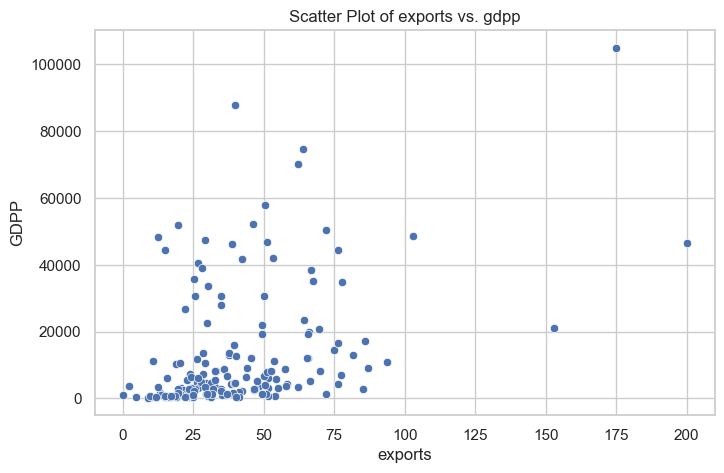

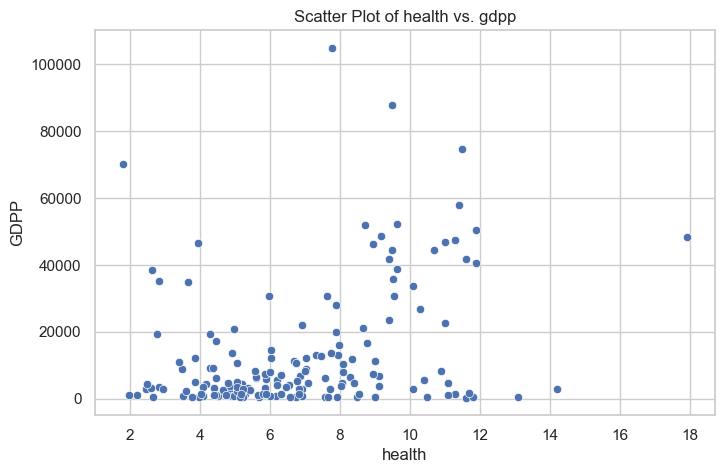

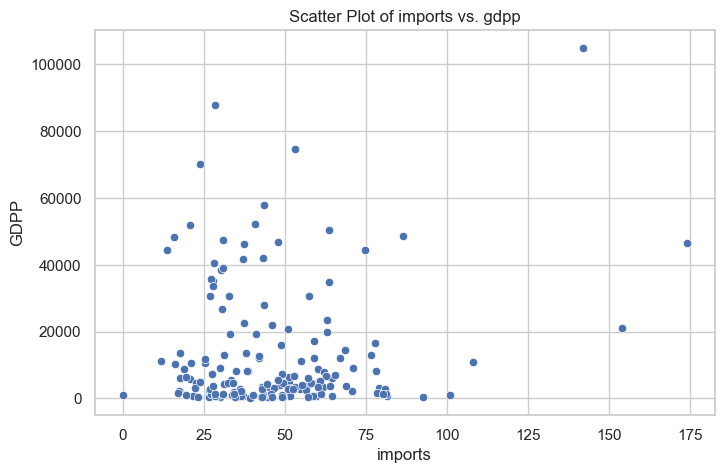

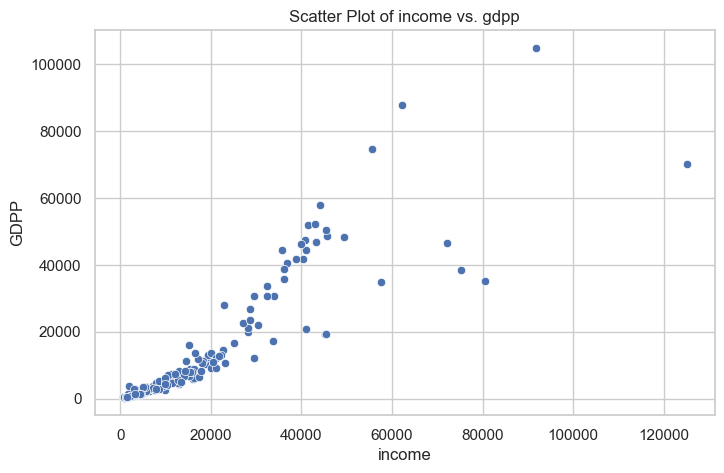

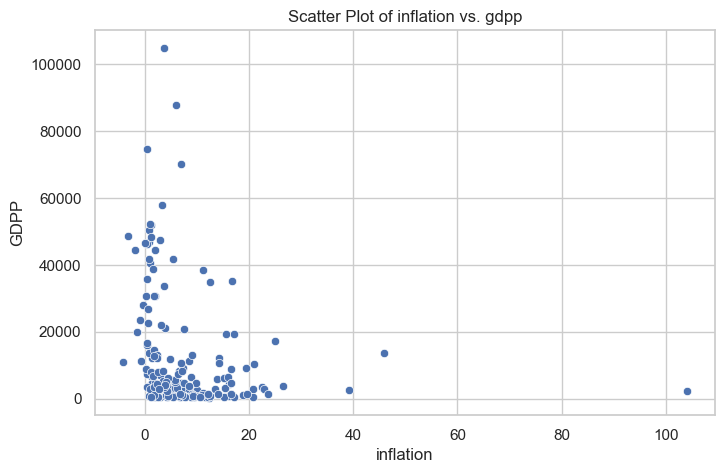

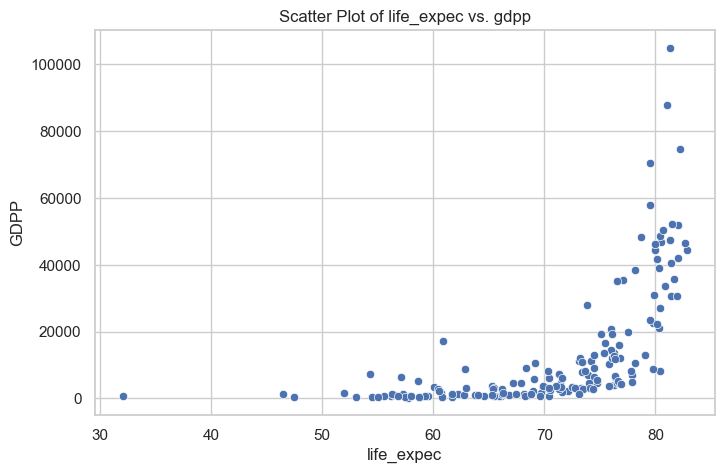

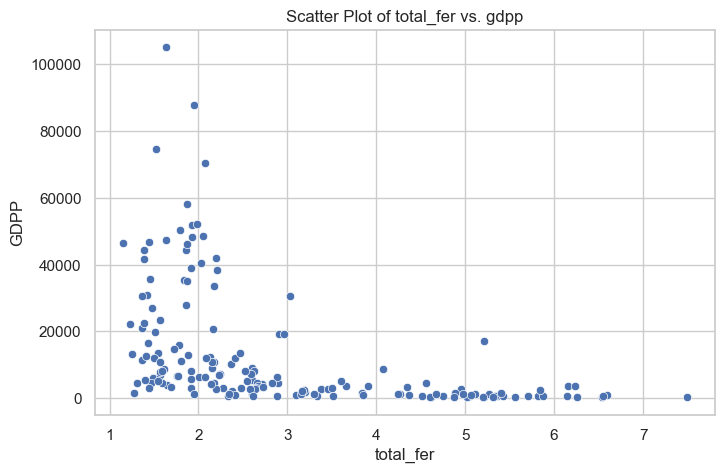

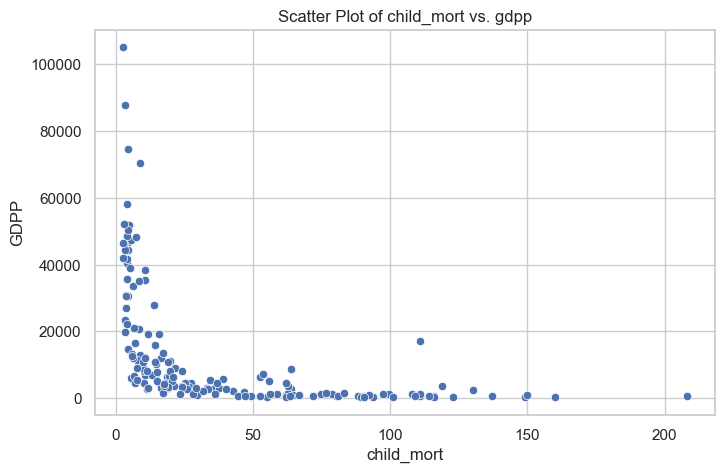

In [16]:
# Explore the continuous independent features against gdpp using scatter plots.

# Selecting continuous independent features
continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create scatter plots
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature, y='gdpp', data=df)
    plt.title(f'Scatter Plot of {feature} vs. gdpp')
    plt.xlabel(feature)
    plt.ylabel('GDPP')
    plt.show()


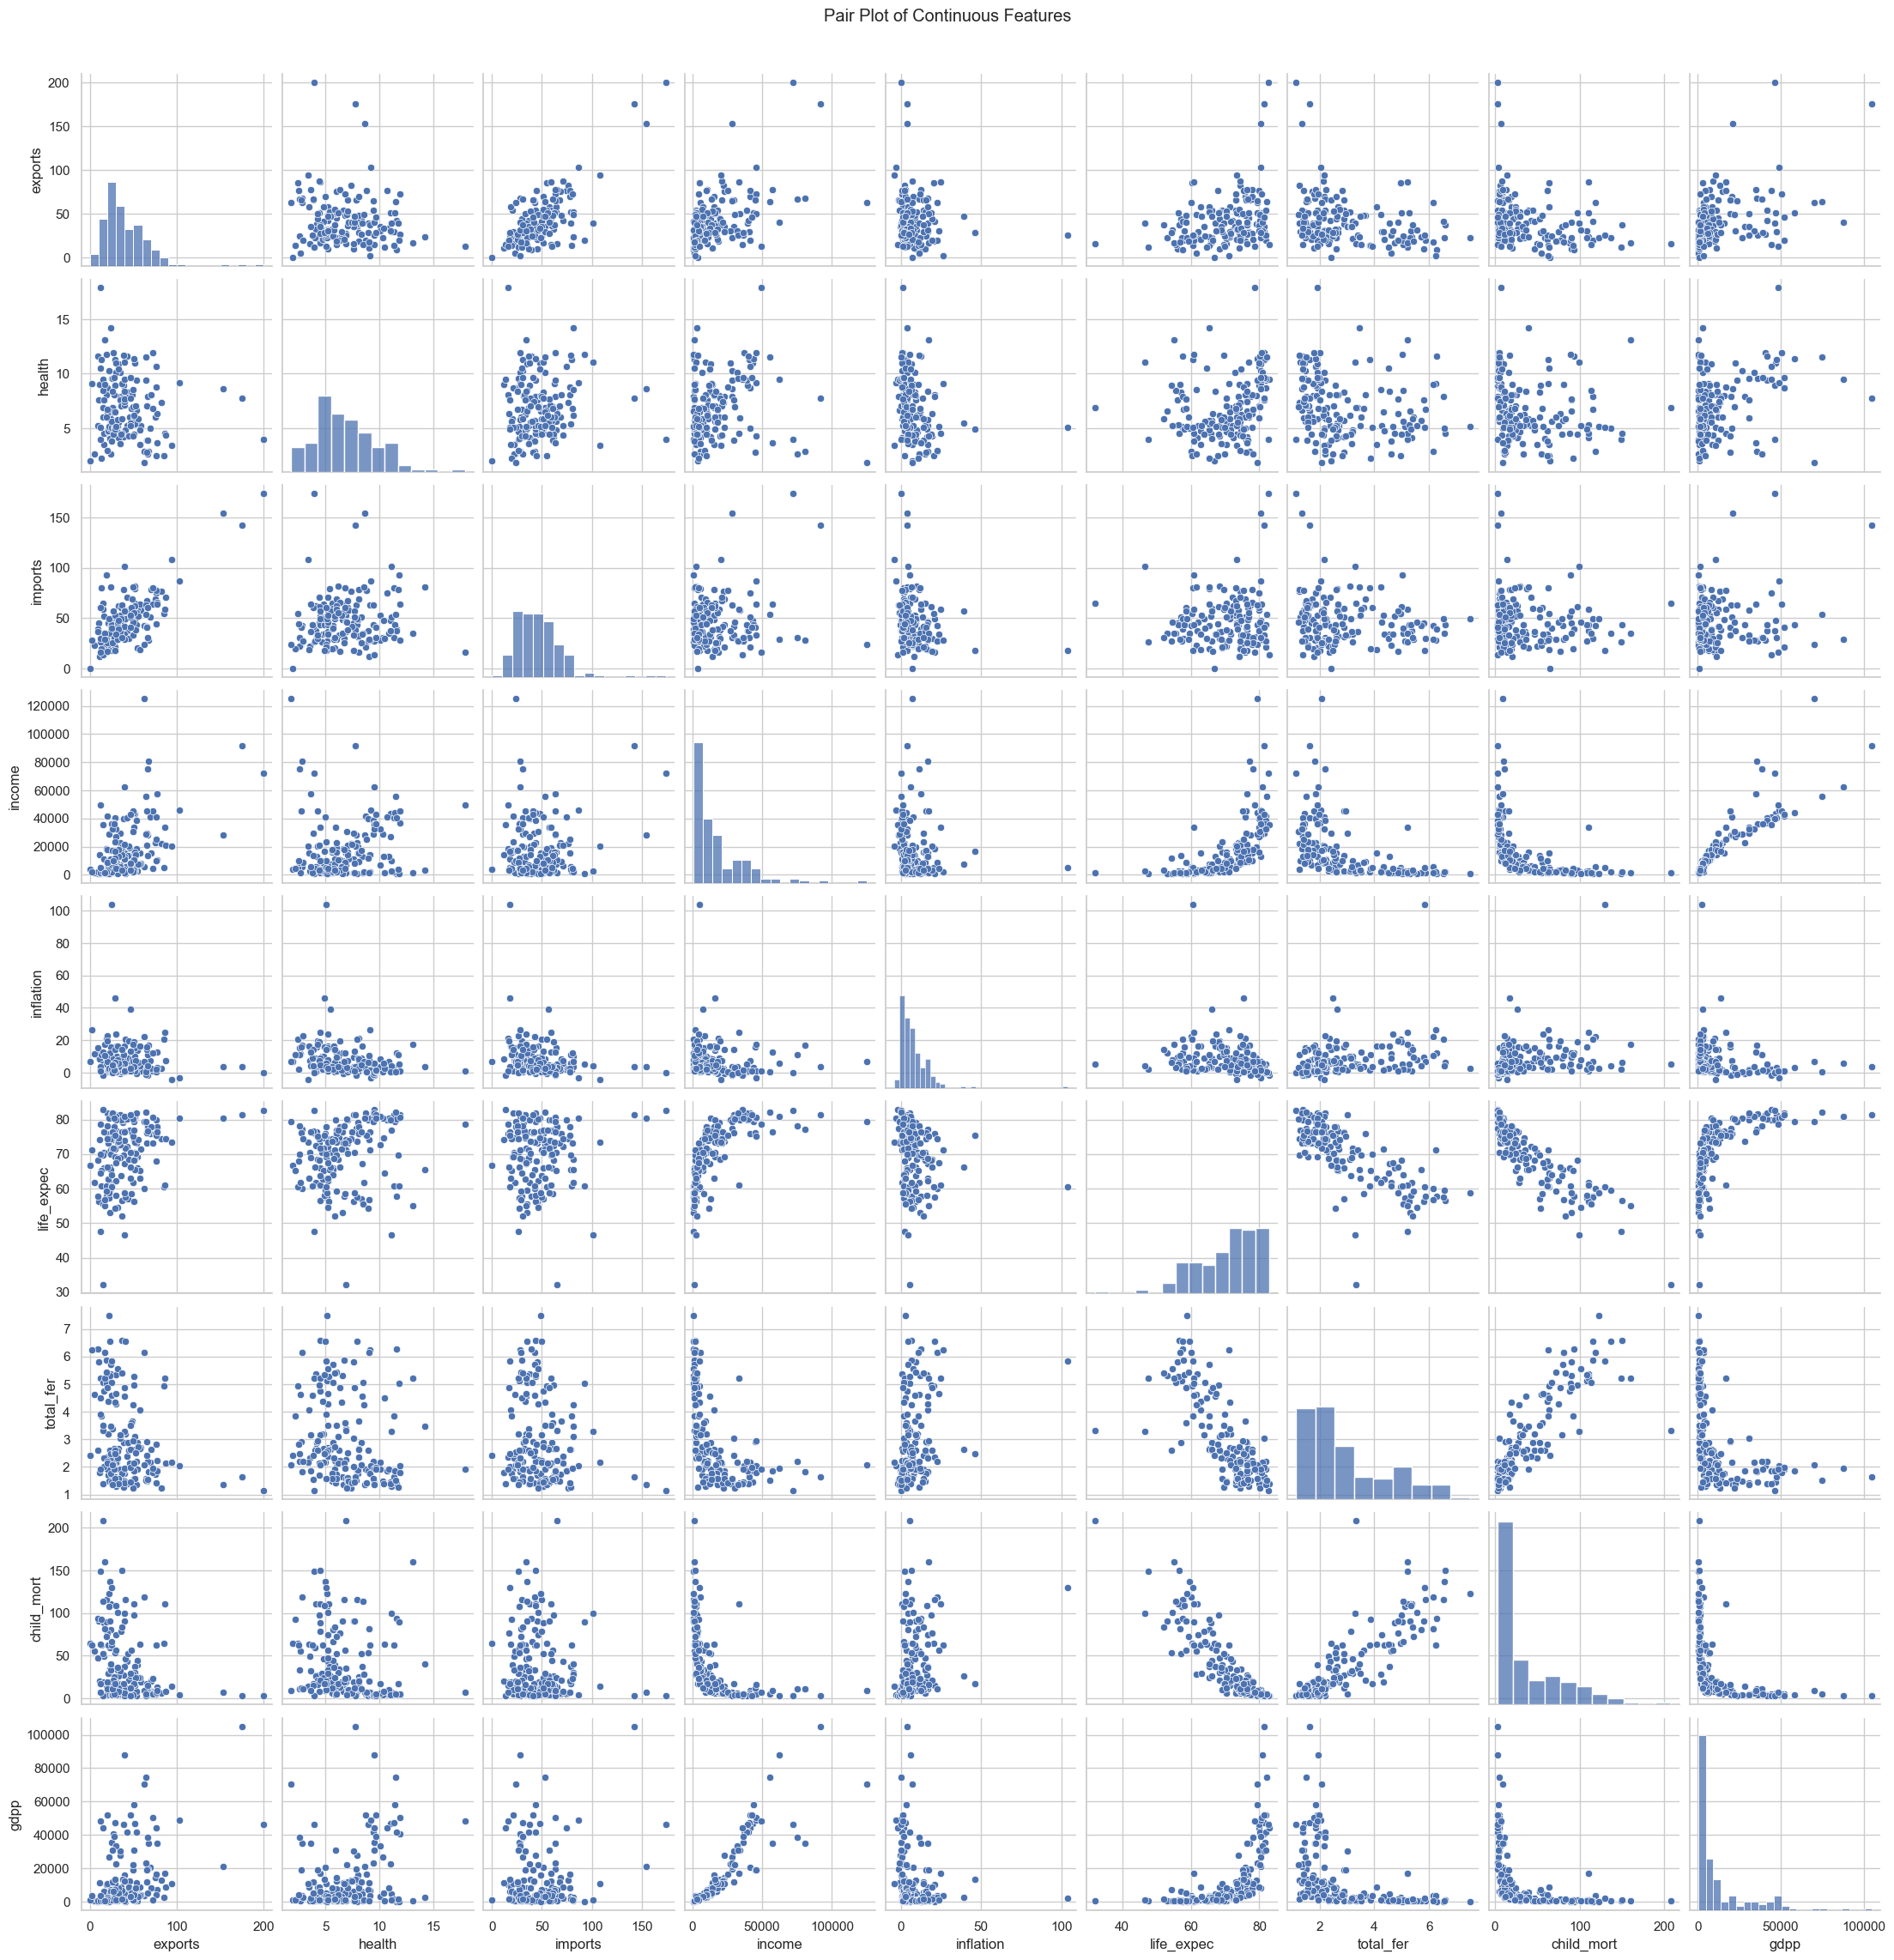

In [17]:
# Selecting continuous independent features
features_for_pairplot = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort', 'gdpp']

# Create a pair plot
sns.pairplot(df[features_for_pairplot])
plt.suptitle('Pair Plot of Continuous Features', y=1.02)
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [18]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"


from sklearn.preprocessing import MinMaxScaler

# Selecting continuous features for normalisation
features_for_scaling = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort', 'gdpp']

# Creating a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_for_scaling]), columns=features_for_scaling)

# Display the first few rows of the normalised DataFrame
print(df_scaled.head())


    exports    health   imports    income  inflation  life_expec  total_fer  \
0  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   0.736593   
1  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   0.078864   
2  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   0.274448   
3  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   0.790221   
4  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   0.154574   

   child_mort      gdpp  
0    0.426485  0.003073  
1    0.068160  0.036833  
2    0.120253  0.040365  
3    0.566699  0.031488  
4    0.037488  0.114242  


## K-Means Clustering

### Selecting K

In [19]:
# Elbow curve analysis
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, max_k+1), within_cluster_vars, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.title('Elbow Curve for KMeans')
    plt.show()

In [23]:
import os

# Set environment variable to avoid KMeans warning
os.environ['OMP_NUM_THREADS'] = '1'


C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

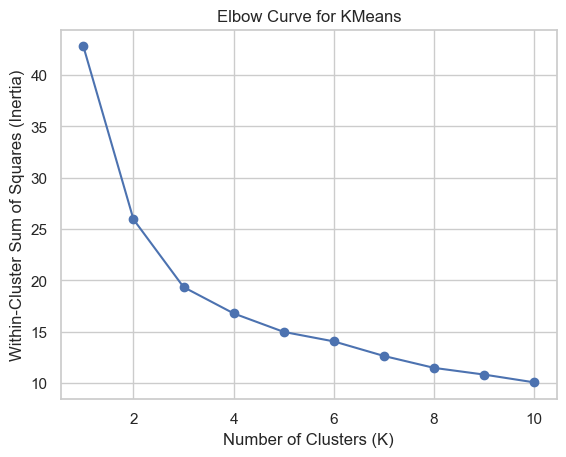

In [24]:
# Elbow curve analysis using the scaled dataset
elbow_Kmeans(df_scaled)

C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

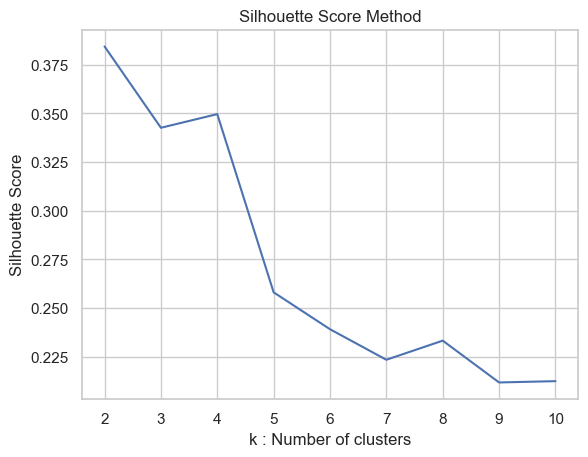

In [27]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Best number of clusters: 2
Silhouette score for the best number of clusters: 0.384471920619431


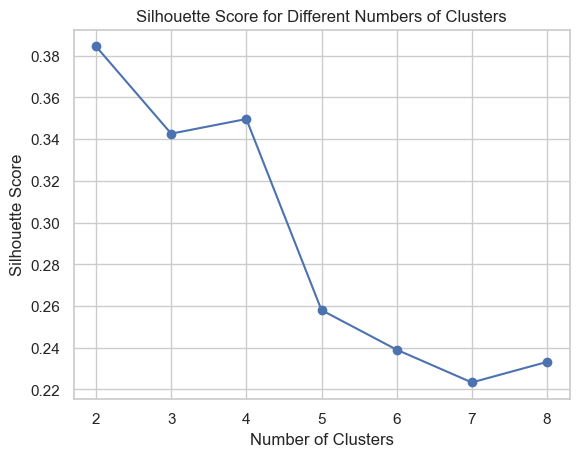

In [28]:
# Set the range of clusters you want to try
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Create a dictionary to store silhouette scores for each number of clusters
silhouette_scores = {}

for n_clusters in range_n_clusters:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    
    # Store the silhouette score in the dictionary
    silhouette_scores[n_clusters] = silhouette_avg

# Find the number of clusters with the highest silhouette score
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_n_clusters]

# Print the results
print(f"Best number of clusters: {best_n_clusters}")
print(f"Silhouette score for the best number of clusters: {best_silhouette_score}")

# Plot silhouette scores for different numbers of clusters
plt.plot(range_n_clusters, list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

Based on the elbow and silhouette score method choose a value for K.

Elbow Method: The optimal number of clusters is often chosen at the "elbow" point, where the decrease in inertia (within-cluster sum of squares) slows down. In your elbow plot, you can visually identify the point where the inertia starts to decrease more slowly. In your case, it seems that K=2 might be a good choice.

Silhouette Score Method: The silhouette score measures how well-defined the clusters are. A higher silhouette score indicates better-defined clusters. In your case, the silhouette score for K=2 is 0.384, which is relatively reasonable.

Considering both methods, it appears that K=2 is a reasonable choice for the number of clusters. However, keep in mind that these methods provide insights, but the final choice of K also depends on the specific characteristics of your data and the goals of your analysis. It's always a good idea to analyze the clusters further and assess their interpretability and usefulness in the context of your problem.

## Fitting a K-Means Model with the selected K value

In [30]:
# Remember to set the random_state to rseed

# Set random seed
rseed = 42

# Fit KMeans model with specified random_state
kmeans = KMeans(n_clusters=optimal_k, random_state=rseed)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[['child_mort', 'exports', 'health']])


C:\Users\ojaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
# Count the number of records in each cluster
cluster_counts = df_scaled['cluster'].value_counts()

# Display the counts
print("Number of records in each cluster:")
print(cluster_counts)

Number of records in each cluster:
0    118
1     49
Name: cluster, dtype: int64


In [33]:
# Check model performance with the silhouette coefficient

silhouette_avg = silhouette_score(df_scaled[['child_mort', 'exports', 'health']], df_scaled['cluster'])
print(f"Silhouette coefficient for the model: {silhouette_avg}")

Silhouette coefficient for the model: 0.39591473757463735


## Predictions

In [36]:
# Add the predicted cluster label column to the original dataframe
df['predicted_cluster'] = kmeans.labels_

# Display the updated dataframe
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,predicted_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Visualisation of clusters

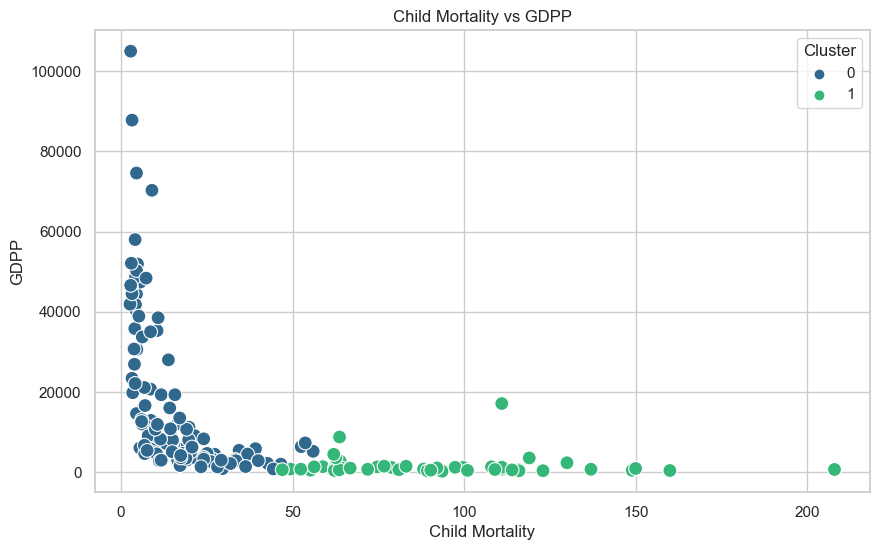

In [50]:
# Visualisation of clusters: child mortality vs gdpp
# Scatter plot of child mortality vs gdpp with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='child_mort', y='gdpp', hue='predicted_cluster', data=df, palette='viridis', s=100)
plt.title('Child Mortality vs GDPP')
plt.xlabel('Child Mortality')
plt.ylabel('GDPP')
plt.legend(title='Cluster')
plt.show()

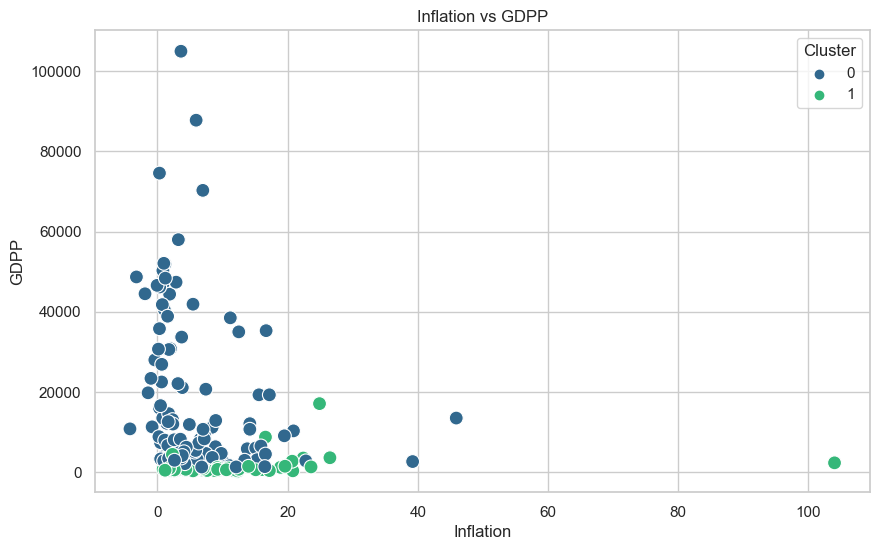

In [51]:
# Visualisation of clusters: inflation vs gdpp

# Scatter plot of inflation vs gdpp with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='inflation', y='gdpp', hue='predicted_cluster', data=df, palette='viridis', s=100)
plt.title('Inflation vs GDPP')
plt.xlabel('Inflation')
plt.ylabel('GDPP')
plt.legend(title='Cluster')
plt.show()


## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**
Cluster 0 (Middle Income):

Child Mortality: Relatively low child mortality.
GDPP: Moderately high GDPP.
Inflation: Moderate inflation.
This cluster represents countries with moderate economic development, indicating a middle-income level.

Cluster 1 (Low Income):

Child Mortality: High child mortality.
GDPP: Low GDPP.
Inflation: High inflation.

Regarding the absence of a "High Income" label, it's possible that the algorithm did not find a distinct cluster that corresponds to countries with high income based on the chosen features. In some cases, high-income countries may be more evenly distributed or not form a distinct cluster in the feature space defined by the selected variables

In [52]:
# Group countries by income label
grouped_countries = df.groupby('income_label')['country'].unique()

# Print out countries with their labels
for label, countries in grouped_countries.items():
    print(f"{label} Income Countries:")
    print(", ".join(countries))
    print("\n")

Low Income Income Countries:
Afghanistan, Angola, Bangladesh, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, India, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Myanmar, Nepal, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Turkmenistan, Uganda, Yemen, Zambia


Middle Income Income Countries:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Barbados, Belarus, Belgium, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei, Bulgaria, Cambodia, Canada, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Denmark, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Finland, France, Georgia, Germany, Greece, Grenad

In [53]:
# Select relevant columns for display
table_columns = ['country', 'income_label']

# Create a new dataframe with selected columns
income_table = df[table_columns]

# Display the table
print(income_table)

                 country   income_label
0            Afghanistan     Low Income
1                Albania  Middle Income
2                Algeria  Middle Income
3                 Angola     Low Income
4    Antigua and Barbuda  Middle Income
..                   ...            ...
162              Vanuatu  Middle Income
163            Venezuela  Middle Income
164              Vietnam  Middle Income
165                Yemen     Low Income
166               Zambia     Low Income

[167 rows x 2 columns]


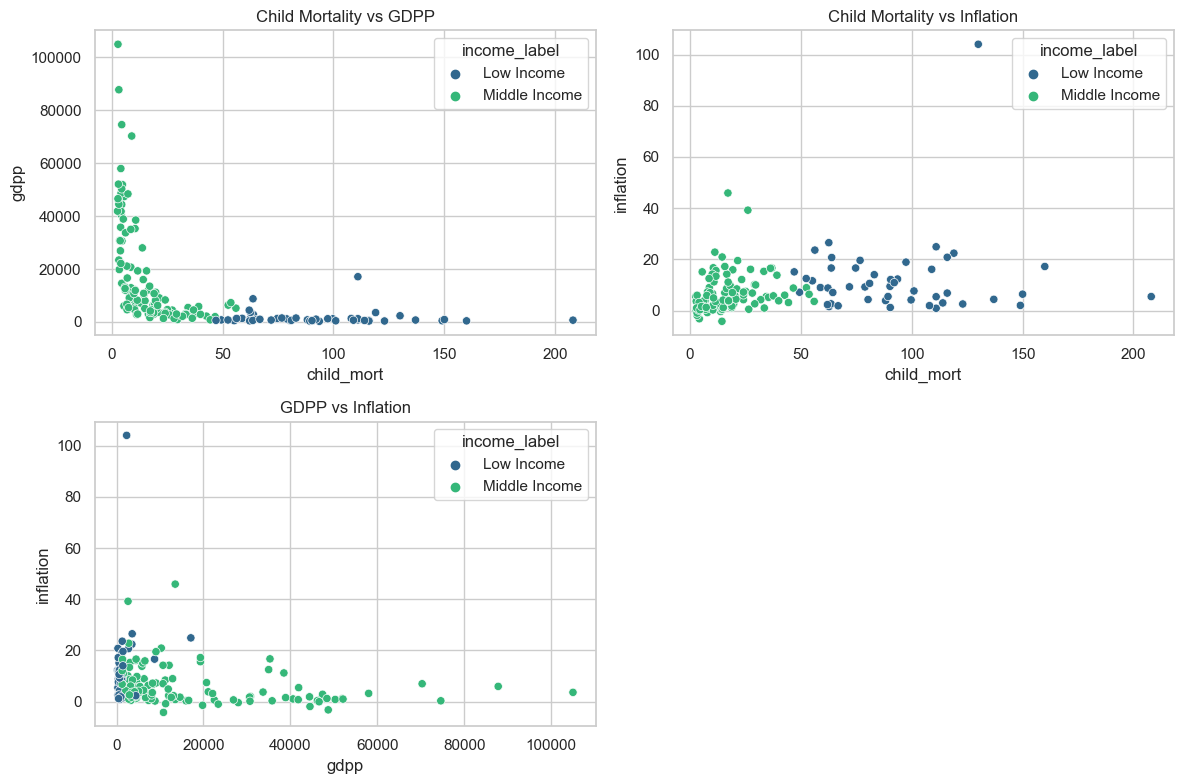

In [54]:
# Assign labels based on cluster characteristics
df['income_label'] = df['predicted_cluster'].map({
    0: 'Middle Income',  # Cluster with characteristics of middle income countries
    1: 'Low Income',      # Cluster with characteristics of low income countries
    2: 'High Income'      # Cluster with characteristics of high income countries
})

# Visualise clusters based on child mortality, GDPP, and inflation
plt.figure(figsize=(12, 8))

# Child Mortality vs GDPP
plt.subplot(2, 2, 1)
sns.scatterplot(x='child_mort', y='gdpp', hue='income_label', data=df, palette='viridis')
plt.title('Child Mortality vs GDPP')

# Child Mortality vs Inflation
plt.subplot(2, 2, 2)
sns.scatterplot(x='child_mort', y='inflation', hue='income_label', data=df, palette='viridis')
plt.title('Child Mortality vs Inflation')

# GDPP vs Inflation
plt.subplot(2, 2, 3)
sns.scatterplot(x='gdpp', y='inflation', hue='income_label', data=df, palette='viridis')
plt.title('GDPP vs Inflation')

plt.tight_layout()
plt.show()

In [56]:
## Select relevant columns for display
table_columns = ['country', 'predicted_cluster', 'income_label']

# Create a new dataframe with selected columns
income_table = df[table_columns]

# Display the table
print(income_table)


                 country  predicted_cluster   income_label
0            Afghanistan                  1     Low Income
1                Albania                  0  Middle Income
2                Algeria                  0  Middle Income
3                 Angola                  1     Low Income
4    Antigua and Barbuda                  0  Middle Income
..                   ...                ...            ...
162              Vanuatu                  0  Middle Income
163            Venezuela                  0  Middle Income
164              Vietnam                  0  Middle Income
165                Yemen                  1     Low Income
166               Zambia                  1     Low Income

[167 rows x 3 columns]
